In [1]:
import numpy as np
import pandas as pd
import sklearn.impute , sklearn.preprocessing
import seaborn 
import matplotlib.pyplot as plt


In [2]:
data_train = pd.read_csv('../work/data/high_salary_train.csv')
data_train

,Unnamed: 0,id,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
0,11286,26890,987463818.0,5066.0,3.0,state-gov,327886.0,doctorate,16.0,divorced,prof-specialty,own-child,white,male,0.0,0.0,3.0,USA,united-states,1.0
1,4160,933,884327274.0,6423.0,3.0,private,99736.0,masters,14.0,divorced,prof-specialty,unmarried,white,male,4.0,0.0,3.0,USA,united-states,1.0
2,8795,25596,397372044.0,9074.0,2.0,private,398575.0,some-college,10.0,never-married,tech-support,unmarried,white,female,0.0,0.0,2.0,USA,united-states,0.0
3,12728,12949,580119132.0,413.0,2.0,private,682947.0,bachelors,13.0,divorced,exec-managerial,not-in-family,white,male,0.0,0.0,3.0,USA,united-states,1.0
4,14302,6681,836161922.0,1790.0,1.0,private,236861.0,hs-grad,9.0,married-civ-spouse,machine-op-inspct,husband,white,male,0.0,0.0,2.0,USA,united-states,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16715,13123,8695,181655516.0,361.0,0.0,private,42706.0,some-college,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,USA,united-states,0.0
16716,19648,2192,796404433.0,950.0,2.0,local-gov,103759.0,some-college,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,USA,united-states,0.0
16717,9845,8250,622635909.0,8689.0,0.0,private,316184.0,hs-grad,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,USA,united-states,0.0
16718,10799,18511,338364928.0,5238.0,2.0,private,481987.0,masters,14.0,married-civ-spouse,tech-support,husband,white,male,0.0,0.0,0.0,USA,united-states,1.0


In [3]:
data_test = pd.read_csv('../work/data/high_salary_test.csv')
data_test

,Unnamed: 0,id,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
0,5961,12849,335086368.0,4170.0,1.0,private,509500.0,bachelors,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,USA,united-states,1.0
1,17395,1460,732733728.0,5442.0,0.0,private,243368.0,preschool,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,MEX,mexico,0.0
2,2294,13594,807579036.0,7659.0,2.0,private,144524.0,hs-grad,9.0,divorced,machine-op-inspct,unmarried,black,female,0.0,0.0,2.0,USA,united-states,0.0
3,6699,14400,201637967.0,4318.0,3.0,private,150975.0,hs-grad,9.0,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,NaN,0.0,2.0,USA,united-states,0.0
4,15063,14333,758267678.0,8392.0,2.0,private,136419.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,USA,united-states,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,18153,21121,793510081.0,3995.0,3.0,private,48358.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,USA,united-states,1.0
4176,4962,12348,922922461.0,9297.0,2.0,private,163215.0,bachelors,13.0,divorced,exec-managerial,not-in-family,white,female,4.0,0.0,2.0,USA,united-states,1.0
4177,1635,22298,455309825.0,8674.0,3.0,private,196328.0,bachelors,13.0,married-civ-spouse,exec-managerial,husband,black,male,0.0,0.0,2.0,USA,united-states,0.0
4178,20509,15636,382989583.0,2765.0,1.0,private,225231.0,some-college,10.0,divorced,exec-managerial,not-in-family,white,male,3.0,0.0,3.0,USA,united-states,1.0


In [4]:
data_live = pd.read_csv('../work/data/high_salary.live.csv')
data_live

,id,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country
0,6111,565712576.0,9337.0,0.0,private,287357.0,11th,7.0,married-civ-spouse,protective-serv,husband,white,male,0.0,0.0,2.0,USA,united-states
1,11214,329599477.0,6457.0,1.0,private,167558.0,hs-grad,9.0,never-married,sales,unmarried,white,female,0.0,0.0,1.0,MEX,mexico
2,5554,222432362.0,189.0,4.0,private,27385.0,hs-grad,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,USA,united-states
3,25131,209882990.0,2048.0,2.0,local-gov,153976.0,masters,14.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,USA,united-states
4,14324,936607310.0,8185.0,3.0,private,20956.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,USA,united-states
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6962,25998,331613078.0,6349.0,4.0,private,117898.0,bachelors,13.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,USA,united-states
6963,8375,353499588.0,5768.0,4.0,private,298546.0,hs-grad,9.0,married-civ-spouse,farming-fishing,husband,white,male,0.0,0.0,4.0,USA,united-states
6964,13888,604365500.0,6286.0,1.0,private,36340.0,11th,7.0,divorced,other-service,unmarried,white,female,0.0,0.0,1.0,USA,united-states
6965,4159,258361593.0,5369.0,1.0,private,173473.0,masters,14.0,married-civ-spouse,prof-specialty,husband,asian-pac-islander,male,0.0,0.0,2.0,USA,united-states


In [5]:
# Check Missing Value

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16720 entries, 0 to 16719
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              16720 non-null  int64  
 1   id                      16720 non-null  int64  
 2   social-security-number  16708 non-null  float64
 3   house-number            16700 non-null  float64
 4   age-group               16713 non-null  float64
 5   workclass               15873 non-null  object 
 6   fnlwgt                  16703 non-null  float64
 7   education               16704 non-null  object 
 8   education-num           16708 non-null  float64
 9   marital-status          16699 non-null  object 
 10  occupation              15875 non-null  object 
 11  relationship            16705 non-null  object 
 12  race                    16706 non-null  object 
 13  sex                     16705 non-null  object 
 14  capitalgain             16700 non-null

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4180 non-null   int64  
 1   id                      4180 non-null   int64  
 2   social-security-number  4178 non-null   float64
 3   house-number            4173 non-null   float64
 4   age-group               4174 non-null   float64
 5   workclass               3970 non-null   object 
 6   fnlwgt                  4174 non-null   float64
 7   education               4176 non-null   object 
 8   education-num           4178 non-null   float64
 9   marital-status          4178 non-null   object 
 10  occupation              3971 non-null   object 
 11  relationship            4174 non-null   object 
 12  race                    4172 non-null   object 
 13  sex                     4173 non-null   object 
 14  capitalgain             4177 non-null   

In [8]:
data_live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6967 entries, 0 to 6966
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6967 non-null   int64  
 1   social-security-number  6965 non-null   float64
 2   house-number            6958 non-null   float64
 3   age-group               6954 non-null   float64
 4   workclass               6622 non-null   object 
 5   fnlwgt                  6963 non-null   float64
 6   education               6960 non-null   object 
 7   education-num           6959 non-null   float64
 8   marital-status          6958 non-null   object 
 9   occupation              6620 non-null   object 
 10  relationship            6954 non-null   object 
 11  race                    6960 non-null   object 
 12  sex                     6960 non-null   object 
 13  capitalgain             6959 non-null   float64
 14  capitalloss             6957 non-null   

In [9]:
#อธิบายว่าทำไมถึงเอาUnnamed: 0 ออก(เป็นfae ที่เกินมาจาก dataset เดิมหลังจากใช้ตัวtrain_test_split)

In [10]:
data_train = data_train.drop(columns=['Unnamed: 0'])
data_train

,id,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
0,26890,987463818.0,5066.0,3.0,state-gov,327886.0,doctorate,16.0,divorced,prof-specialty,own-child,white,male,0.0,0.0,3.0,USA,united-states,1.0
1,933,884327274.0,6423.0,3.0,private,99736.0,masters,14.0,divorced,prof-specialty,unmarried,white,male,4.0,0.0,3.0,USA,united-states,1.0
2,25596,397372044.0,9074.0,2.0,private,398575.0,some-college,10.0,never-married,tech-support,unmarried,white,female,0.0,0.0,2.0,USA,united-states,0.0
3,12949,580119132.0,413.0,2.0,private,682947.0,bachelors,13.0,divorced,exec-managerial,not-in-family,white,male,0.0,0.0,3.0,USA,united-states,1.0
4,6681,836161922.0,1790.0,1.0,private,236861.0,hs-grad,9.0,married-civ-spouse,machine-op-inspct,husband,white,male,0.0,0.0,2.0,USA,united-states,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16715,8695,181655516.0,361.0,0.0,private,42706.0,some-college,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,USA,united-states,0.0
16716,2192,796404433.0,950.0,2.0,local-gov,103759.0,some-college,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,USA,united-states,0.0
16717,8250,622635909.0,8689.0,0.0,private,316184.0,hs-grad,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,USA,united-states,0.0
16718,18511,338364928.0,5238.0,2.0,private,481987.0,masters,14.0,married-civ-spouse,tech-support,husband,white,male,0.0,0.0,0.0,USA,united-states,1.0


In [11]:
data_test = data_test.drop(columns=['Unnamed: 0'])
data_test

,id,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
0,12849,335086368.0,4170.0,1.0,private,509500.0,bachelors,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,USA,united-states,1.0
1,1460,732733728.0,5442.0,0.0,private,243368.0,preschool,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,MEX,mexico,0.0
2,13594,807579036.0,7659.0,2.0,private,144524.0,hs-grad,9.0,divorced,machine-op-inspct,unmarried,black,female,0.0,0.0,2.0,USA,united-states,0.0
3,14400,201637967.0,4318.0,3.0,private,150975.0,hs-grad,9.0,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,NaN,0.0,2.0,USA,united-states,0.0
4,14333,758267678.0,8392.0,2.0,private,136419.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,USA,united-states,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,21121,793510081.0,3995.0,3.0,private,48358.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,USA,united-states,1.0
4176,12348,922922461.0,9297.0,2.0,private,163215.0,bachelors,13.0,divorced,exec-managerial,not-in-family,white,female,4.0,0.0,2.0,USA,united-states,1.0
4177,22298,455309825.0,8674.0,3.0,private,196328.0,bachelors,13.0,married-civ-spouse,exec-managerial,husband,black,male,0.0,0.0,2.0,USA,united-states,0.0
4178,15636,382989583.0,2765.0,1.0,private,225231.0,some-college,10.0,divorced,exec-managerial,not-in-family,white,male,3.0,0.0,3.0,USA,united-states,1.0


In [12]:
data_train.isnull().sum()

id                          0
social-security-number     12
house-number               20
age-group                   7
workclass                 847
fnlwgt                     17
education                  16
education-num              12
marital-status             21
occupation                845
relationship               15
race                       14
sex                        15
capitalgain                20
capitalloss                14
hoursperweek               19
native-country-code       322
native-country            323
label                       0
dtype: int64

In [13]:
data_test.isnull().sum()

id                          0
social-security-number      2
house-number                7
age-group                   6
workclass                 210
fnlwgt                      6
education                   4
education-num               2
marital-status              2
occupation                209
relationship                6
race                        8
sex                         7
capitalgain                 3
capitalloss                 7
hoursperweek                2
native-country-code        77
native-country             75
label                       0
dtype: int64

In [14]:
data_live.isnull().sum()

id                          0
social-security-number      2
house-number                9
age-group                  13
workclass                 345
fnlwgt                      4
education                   7
education-num               8
marital-status              9
occupation                347
relationship               13
race                        7
sex                         7
capitalgain                 8
capitalloss                10
hoursperweek               13
native-country-code       122
native-country            123
dtype: int64

In [15]:
data_train['label'].value_counts()

label
0.0    9719
1.0    7001
Name: count, dtype: int64

In [16]:
data_test['label'].value_counts()

label
0.0    2416
1.0    1764
Name: count, dtype: int64

In [17]:
for col in data_train.columns:
    print(f"{col}: {data_train[col].unique()}")

id: [26890   933 25596 ...  8250 18511 16074]
social-security-number: [9.87463818e+08 8.84327274e+08 3.97372044e+08 ... 6.22635909e+08
 3.38364928e+08 6.57404344e+08]
house-number: [5066. 6423. 9074. ... 5421. 8754. 8019.]
age-group: [ 3.  2.  1.  0.  4. nan]
workclass: ['state-gov' 'private' 'self-emp-inc' nan 'self-emp-not-inc' 'federal-gov'
 'local-gov' 'without-pay' 'never-worked']
fnlwgt: [327886.  99736. 398575. ... 115389. 316184.  75065.]
education: ['doctorate' 'masters' 'some-college' 'bachelors' 'hs-grad' 'assoc-voc'
 '12th' 'prof-school' '7th-8th' '11th' '10th' 'assoc-acdm' '9th' '5th-6th'
 '1st-4th' nan 'preschool']
education-num: [16. 14. 10. 13.  9. 11.  8. 15.  4.  7.  6. 12.  5.  3.  2.  1. nan]
marital-status: ['divorced' 'never-married' 'married-civ-spouse' 'separated' 'widowed'
 'married-spouse-absent' nan 'married-af-spouse']
occupation: ['prof-specialty' 'tech-support' 'exec-managerial' 'machine-op-inspct'
 'sales' 'handlers-cleaners' 'craft-repair' 'other-service

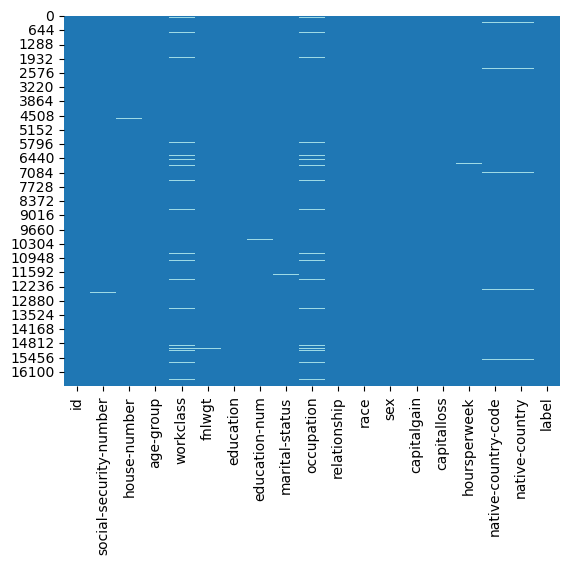

In [18]:
seaborn.heatmap(data_train.isnull(),cbar=False,cmap='tab20')
plt.show()

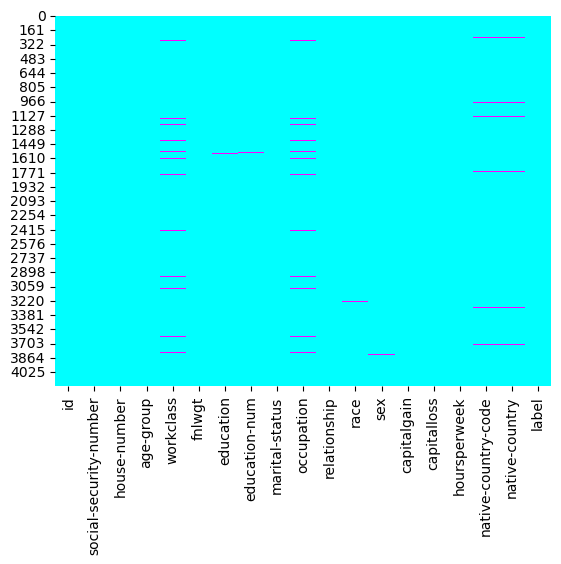

In [19]:
seaborn.heatmap(data_test.isnull(),cbar=False,cmap='cool')
plt.show()

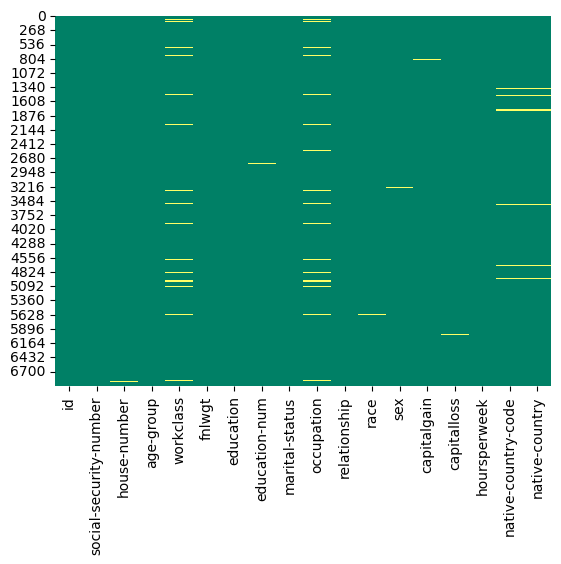

In [20]:
seaborn.heatmap(data_live.isnull(),cbar=False,cmap='summer')
plt.show()

In [21]:
#พอดูจากกราฟ ก็จะได้ข้อสรุปว่าควรจัดการ missing ยังไง แต่ขั้นตอนตอนต่อไปคือ แบ่งเป็น cat,num

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
categorical_features_train = data_train.select_dtypes(include=['object', 'category']).columns
categorical_features_train

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country-code', 'native-country'],
      dtype='object')

In [24]:
categorical_features_test = data_test.select_dtypes(include=['object', 'category']).columns
categorical_features_test

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country-code', 'native-country'],
      dtype='object')

In [25]:
categorical_features_live = data_live.select_dtypes(include=['object', 'category']).columns
categorical_features_live

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country-code', 'native-country'],
      dtype='object')

In [26]:
categorical_features_data_train = data_train[categorical_features_train]
categorical_features_data_train

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
0,state-gov,doctorate,divorced,prof-specialty,own-child,white,male,USA,united-states
1,private,masters,divorced,prof-specialty,unmarried,white,male,USA,united-states
2,private,some-college,never-married,tech-support,unmarried,white,female,USA,united-states
3,private,bachelors,divorced,exec-managerial,not-in-family,white,male,USA,united-states
4,private,hs-grad,married-civ-spouse,machine-op-inspct,husband,white,male,USA,united-states
...,...,...,...,...,...,...,...,...,...
16715,private,some-college,never-married,prof-specialty,not-in-family,white,male,USA,united-states
16716,local-gov,some-college,married-civ-spouse,transport-moving,husband,white,male,USA,united-states
16717,private,hs-grad,never-married,other-service,other-relative,black,male,USA,united-states
16718,private,masters,married-civ-spouse,tech-support,husband,white,male,USA,united-states


In [27]:
categorical_features_data_test = data_test[categorical_features_test]
categorical_features_data_test

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
0,private,bachelors,never-married,tech-support,not-in-family,white,female,USA,united-states
1,private,preschool,never-married,farming-fishing,not-in-family,white,male,MEX,mexico
2,private,hs-grad,divorced,machine-op-inspct,unmarried,black,female,USA,united-states
3,private,hs-grad,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,USA,united-states
4,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states
...,...,...,...,...,...,...,...,...,...
4175,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states
4176,private,bachelors,divorced,exec-managerial,not-in-family,white,female,USA,united-states
4177,private,bachelors,married-civ-spouse,exec-managerial,husband,black,male,USA,united-states
4178,private,some-college,divorced,exec-managerial,not-in-family,white,male,USA,united-states


In [28]:
categorical_features_data_live = data_live[categorical_features_live]
categorical_features_data_live

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
0,private,11th,married-civ-spouse,protective-serv,husband,white,male,USA,united-states
1,private,hs-grad,never-married,sales,unmarried,white,female,MEX,mexico
2,private,hs-grad,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states
3,local-gov,masters,married-civ-spouse,prof-specialty,husband,white,male,USA,united-states
4,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states
...,...,...,...,...,...,...,...,...,...
6962,private,bachelors,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states
6963,private,hs-grad,married-civ-spouse,farming-fishing,husband,white,male,USA,united-states
6964,private,11th,divorced,other-service,unmarried,white,female,USA,united-states
6965,private,masters,married-civ-spouse,prof-specialty,husband,asian-pac-islander,male,USA,united-states


In [29]:
categorical_impute= SimpleImputer(strategy='most_frequent')
categorical_impute

SimpleImputer(strategy='most_frequent')

In [30]:
categorical_impute.fit(categorical_features_data_train)

SimpleImputer(strategy='most_frequent')

In [31]:
categorical_features_data_train = pd.DataFrame(
    data = categorical_impute.transform(categorical_features_data_train),
    columns = categorical_impute.get_feature_names_out(),
    index = categorical_features_data_train.index
)
categorical_features_data_train

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
0,state-gov,doctorate,divorced,prof-specialty,own-child,white,male,USA,united-states
1,private,masters,divorced,prof-specialty,unmarried,white,male,USA,united-states
2,private,some-college,never-married,tech-support,unmarried,white,female,USA,united-states
3,private,bachelors,divorced,exec-managerial,not-in-family,white,male,USA,united-states
4,private,hs-grad,married-civ-spouse,machine-op-inspct,husband,white,male,USA,united-states
...,...,...,...,...,...,...,...,...,...
16715,private,some-college,never-married,prof-specialty,not-in-family,white,male,USA,united-states
16716,local-gov,some-college,married-civ-spouse,transport-moving,husband,white,male,USA,united-states
16717,private,hs-grad,never-married,other-service,other-relative,black,male,USA,united-states
16718,private,masters,married-civ-spouse,tech-support,husband,white,male,USA,united-states


In [32]:
categorical_features_data_test = pd.DataFrame(
    data = categorical_impute.transform(categorical_features_data_test),
    columns = categorical_impute.get_feature_names_out(),
    index = categorical_features_data_test.index
)
categorical_features_data_test

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
0,private,bachelors,never-married,tech-support,not-in-family,white,female,USA,united-states
1,private,preschool,never-married,farming-fishing,not-in-family,white,male,MEX,mexico
2,private,hs-grad,divorced,machine-op-inspct,unmarried,black,female,USA,united-states
3,private,hs-grad,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,USA,united-states
4,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states
...,...,...,...,...,...,...,...,...,...
4175,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states
4176,private,bachelors,divorced,exec-managerial,not-in-family,white,female,USA,united-states
4177,private,bachelors,married-civ-spouse,exec-managerial,husband,black,male,USA,united-states
4178,private,some-college,divorced,exec-managerial,not-in-family,white,male,USA,united-states


In [33]:
categorical_features_data_live = pd.DataFrame(
    data = categorical_impute.transform(categorical_features_data_live),
    columns = categorical_impute.get_feature_names_out(),
    index = categorical_features_data_live.index
)
categorical_features_data_live

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country
0,private,11th,married-civ-spouse,protective-serv,husband,white,male,USA,united-states
1,private,hs-grad,never-married,sales,unmarried,white,female,MEX,mexico
2,private,hs-grad,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states
3,local-gov,masters,married-civ-spouse,prof-specialty,husband,white,male,USA,united-states
4,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states
...,...,...,...,...,...,...,...,...,...
6962,private,bachelors,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states
6963,private,hs-grad,married-civ-spouse,farming-fishing,husband,white,male,USA,united-states
6964,private,11th,divorced,other-service,unmarried,white,female,USA,united-states
6965,private,masters,married-civ-spouse,prof-specialty,husband,asian-pac-islander,male,USA,united-states


In [34]:
categorical_features_data_train.isnull().sum()

workclass              0
education              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
dtype: int64

In [35]:
categorical_features_data_test.isnull().sum()

workclass              0
education              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
dtype: int64

In [36]:
categorical_features_data_live.isnull().sum()

workclass              0
education              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
dtype: int64

In [37]:
numerical_features = [
    'age-group',
    'education-num',
    'capitalgain',
    'capitalloss',
    'hoursperweek'
]
numerical_features

['age-group', 'education-num', 'capitalgain', 'capitalloss', 'hoursperweek']

In [38]:
numerical_features_data_train = data_train[numerical_features]
numerical_features_data_train

,age-group,education-num,capitalgain,capitalloss,hoursperweek
0,3.0,16.0,0.0,0.0,3.0
1,3.0,14.0,4.0,0.0,3.0
2,2.0,10.0,0.0,0.0,2.0
3,2.0,13.0,0.0,0.0,3.0
4,1.0,9.0,0.0,0.0,2.0
...,...,...,...,...,...
16715,0.0,10.0,0.0,0.0,2.0
16716,2.0,10.0,2.0,0.0,2.0
16717,0.0,9.0,0.0,0.0,2.0
16718,2.0,14.0,0.0,0.0,0.0


In [39]:
numerical_features_data_test = data_test[numerical_features]
numerical_features_data_test

,age-group,education-num,capitalgain,capitalloss,hoursperweek
0,1.0,13.0,2.0,0.0,2.0
1,0.0,1.0,0.0,0.0,3.0
2,2.0,9.0,0.0,0.0,2.0
3,3.0,9.0,NaN,0.0,2.0
4,2.0,9.0,0.0,0.0,3.0
...,...,...,...,...,...
4175,3.0,9.0,0.0,0.0,2.0
4176,2.0,13.0,4.0,0.0,2.0
4177,3.0,13.0,0.0,0.0,2.0
4178,1.0,10.0,3.0,0.0,3.0


In [40]:
numerical_features_data_live = data_live[numerical_features]
numerical_features_data_live

,age-group,education-num,capitalgain,capitalloss,hoursperweek
0,0.0,7.0,0.0,0.0,2.0
1,1.0,9.0,0.0,0.0,1.0
2,4.0,9.0,0.0,0.0,3.0
3,2.0,14.0,0.0,0.0,2.0
4,3.0,9.0,0.0,0.0,2.0
...,...,...,...,...,...
6962,4.0,13.0,0.0,0.0,3.0
6963,4.0,9.0,0.0,0.0,4.0
6964,1.0,7.0,0.0,0.0,1.0
6965,1.0,14.0,0.0,0.0,2.0


In [41]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputer

KNNImputer()

In [42]:
numerical_impute_train = imputer.fit_transform(numerical_features_data_train)
numerical_impute_test = imputer.fit_transform(numerical_features_data_test)
numerical_impute_live = imputer.fit_transform(numerical_features_data_live)


In [43]:
numerical_features_data_train = pd.DataFrame(
    data = numerical_impute_train,
    columns = numerical_features_data_train.columns,
    index = numerical_features_data_train.index
)
numerical_features_data_train

,age-group,education-num,capitalgain,capitalloss,hoursperweek
0,3.0,16.0,0.0,0.0,3.0
1,3.0,14.0,4.0,0.0,3.0
2,2.0,10.0,0.0,0.0,2.0
3,2.0,13.0,0.0,0.0,3.0
4,1.0,9.0,0.0,0.0,2.0
...,...,...,...,...,...
16715,0.0,10.0,0.0,0.0,2.0
16716,2.0,10.0,2.0,0.0,2.0
16717,0.0,9.0,0.0,0.0,2.0
16718,2.0,14.0,0.0,0.0,0.0


In [44]:
numerical_features_data_test = pd.DataFrame(
    data = numerical_impute_test,
    columns = numerical_features_data_test.columns,
    index = numerical_features_data_test.index
)
numerical_features_data_test

,age-group,education-num,capitalgain,capitalloss,hoursperweek
0,1.0,13.0,2.0,0.0,2.0
1,0.0,1.0,0.0,0.0,3.0
2,2.0,9.0,0.0,0.0,2.0
3,3.0,9.0,0.0,0.0,2.0
4,2.0,9.0,0.0,0.0,3.0
...,...,...,...,...,...
4175,3.0,9.0,0.0,0.0,2.0
4176,2.0,13.0,4.0,0.0,2.0
4177,3.0,13.0,0.0,0.0,2.0
4178,1.0,10.0,3.0,0.0,3.0


In [45]:
numerical_features_data_live = pd.DataFrame(
    data = numerical_impute_live,
    columns = numerical_features_data_live.columns,
    index = numerical_features_data_live.index
)
numerical_features_data_live

,age-group,education-num,capitalgain,capitalloss,hoursperweek
0,0.0,7.0,0.0,0.0,2.0
1,1.0,9.0,0.0,0.0,1.0
2,4.0,9.0,0.0,0.0,3.0
3,2.0,14.0,0.0,0.0,2.0
4,3.0,9.0,0.0,0.0,2.0
...,...,...,...,...,...
6962,4.0,13.0,0.0,0.0,3.0
6963,4.0,9.0,0.0,0.0,4.0
6964,1.0,7.0,0.0,0.0,1.0
6965,1.0,14.0,0.0,0.0,2.0


In [46]:
numerical_features_data_train.isnull().sum()

age-group        0
education-num    0
capitalgain      0
capitalloss      0
hoursperweek     0
dtype: int64

In [47]:
numerical_features_data_test.isnull().sum()

age-group        0
education-num    0
capitalgain      0
capitalloss      0
hoursperweek     0
dtype: int64

In [48]:
numerical_features_data_live.isnull().sum()

age-group        0
education-num    0
capitalgain      0
capitalloss      0
hoursperweek     0
dtype: int64

In [49]:
for col in numerical_features_data_train.columns:
    print(f"{col}: {numerical_features_data_train[col].unique()}")

age-group: [3.  2.  1.  0.  4.  2.8 1.8 2.2 2.4]
education-num: [16.  14.  10.  13.   9.  11.   8.  15.   4.   7.   6.  12.   5.   3.
  2.   1.   9.6 10.4  9.4 12.8  8.2 11.4]
capitalgain: [0.  4.  3.  2.  1.  0.8 1.2 1.4 0.4 0.6]
capitalloss: [0.  3.  2.  1.  4.  0.4 0.8]
hoursperweek: [3.  2.  0.  1.  4.  2.8 2.6 1.2 2.4 2.2 1.4 0.6 1.6]


In [50]:
#รวมไฟล์

In [51]:
data_train =(
    categorical_features_data_train
    .join(numerical_features_data_train)
    .join(data_train['label'])
)
data_train

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country,age-group,education-num,capitalgain,capitalloss,hoursperweek,label
0,state-gov,doctorate,divorced,prof-specialty,own-child,white,male,USA,united-states,3.0,16.0,0.0,0.0,3.0,1.0
1,private,masters,divorced,prof-specialty,unmarried,white,male,USA,united-states,3.0,14.0,4.0,0.0,3.0,1.0
2,private,some-college,never-married,tech-support,unmarried,white,female,USA,united-states,2.0,10.0,0.0,0.0,2.0,0.0
3,private,bachelors,divorced,exec-managerial,not-in-family,white,male,USA,united-states,2.0,13.0,0.0,0.0,3.0,1.0
4,private,hs-grad,married-civ-spouse,machine-op-inspct,husband,white,male,USA,united-states,1.0,9.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16715,private,some-college,never-married,prof-specialty,not-in-family,white,male,USA,united-states,0.0,10.0,0.0,0.0,2.0,0.0
16716,local-gov,some-college,married-civ-spouse,transport-moving,husband,white,male,USA,united-states,2.0,10.0,2.0,0.0,2.0,0.0
16717,private,hs-grad,never-married,other-service,other-relative,black,male,USA,united-states,0.0,9.0,0.0,0.0,2.0,0.0
16718,private,masters,married-civ-spouse,tech-support,husband,white,male,USA,united-states,2.0,14.0,0.0,0.0,0.0,1.0


In [52]:
data_test =(
    categorical_features_data_test
    .join(numerical_features_data_test)
    .join(data_test['label'])
)
data_test

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country,age-group,education-num,capitalgain,capitalloss,hoursperweek,label
0,private,bachelors,never-married,tech-support,not-in-family,white,female,USA,united-states,1.0,13.0,2.0,0.0,2.0,1.0
1,private,preschool,never-married,farming-fishing,not-in-family,white,male,MEX,mexico,0.0,1.0,0.0,0.0,3.0,0.0
2,private,hs-grad,divorced,machine-op-inspct,unmarried,black,female,USA,united-states,2.0,9.0,0.0,0.0,2.0,0.0
3,private,hs-grad,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,USA,united-states,3.0,9.0,0.0,0.0,2.0,0.0
4,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states,2.0,9.0,0.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states,3.0,9.0,0.0,0.0,2.0,1.0
4176,private,bachelors,divorced,exec-managerial,not-in-family,white,female,USA,united-states,2.0,13.0,4.0,0.0,2.0,1.0
4177,private,bachelors,married-civ-spouse,exec-managerial,husband,black,male,USA,united-states,3.0,13.0,0.0,0.0,2.0,0.0
4178,private,some-college,divorced,exec-managerial,not-in-family,white,male,USA,united-states,1.0,10.0,3.0,0.0,3.0,1.0


In [53]:
data_live =(
    categorical_features_data_live
    .join(numerical_features_data_live)
)
data_live

,workclass,education,marital-status,occupation,relationship,race,sex,native-country-code,native-country,age-group,education-num,capitalgain,capitalloss,hoursperweek
0,private,11th,married-civ-spouse,protective-serv,husband,white,male,USA,united-states,0.0,7.0,0.0,0.0,2.0
1,private,hs-grad,never-married,sales,unmarried,white,female,MEX,mexico,1.0,9.0,0.0,0.0,1.0
2,private,hs-grad,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states,4.0,9.0,0.0,0.0,3.0
3,local-gov,masters,married-civ-spouse,prof-specialty,husband,white,male,USA,united-states,2.0,14.0,0.0,0.0,2.0
4,private,hs-grad,married-civ-spouse,craft-repair,husband,white,male,USA,united-states,3.0,9.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6962,private,bachelors,married-civ-spouse,exec-managerial,husband,white,male,USA,united-states,4.0,13.0,0.0,0.0,3.0
6963,private,hs-grad,married-civ-spouse,farming-fishing,husband,white,male,USA,united-states,4.0,9.0,0.0,0.0,4.0
6964,private,11th,divorced,other-service,unmarried,white,female,USA,united-states,1.0,7.0,0.0,0.0,1.0
6965,private,masters,married-civ-spouse,prof-specialty,husband,asian-pac-islander,male,USA,united-states,1.0,14.0,0.0,0.0,2.0


In [54]:
for col in data_train.columns:
    print(f"{col}: {data_train[col].unique()}")

workclass: ['state-gov' 'private' 'self-emp-inc' 'self-emp-not-inc' 'federal-gov'
 'local-gov' 'without-pay' 'never-worked']
education: ['doctorate' 'masters' 'some-college' 'bachelors' 'hs-grad' 'assoc-voc'
 '12th' 'prof-school' '7th-8th' '11th' '10th' 'assoc-acdm' '9th' '5th-6th'
 '1st-4th' 'preschool']
marital-status: ['divorced' 'never-married' 'married-civ-spouse' 'separated' 'widowed'
 'married-spouse-absent' 'married-af-spouse']
occupation: ['prof-specialty' 'tech-support' 'exec-managerial' 'machine-op-inspct'
 'sales' 'handlers-cleaners' 'craft-repair' 'other-service' 'adm-clerical'
 'transport-moving' 'protective-serv' 'farming-fishing' 'priv-house-serv'
 'armed-forces']
relationship: ['own-child' 'unmarried' 'not-in-family' 'husband' 'wife' 'other-relative']
race: ['white' 'black' 'asian-pac-islander' 'other' 'amer-indian-eskimo']
sex: ['male' 'female']
native-country-code: ['USA' 'HTI' 'GRC' 'ZAF' 'IND' 'CHN' 'LAO' 'JPN' 'PHL' 'COL' 'VNM' 'PRI'
 'YUG' 'CUB' 'DUE' 'ITA' 'TWN'

In [55]:
nominal_features = [
    	'workclass',
    'education',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
]

In [62]:
nominal_mapping = [
    ['state-gov', 'private', 'self-emp-inc', 'self-emp-not-inc', 'federal-gov', 'local-gov', 'without-pay', 'never-worked'],
    ['doctorate', 'masters', 'some-college', 'bachelors', 'hs-grad', 'assoc-voc',
 '12th', 'prof-school', '7th-8th', '11th', '10th', 'assoc-acdm', '9th', '5th-6th',
 '1st-4th', 'preschool'],
    ['divorced', 'never-married', 'married-civ-spouse', 'separated','widowed',
 'married-spouse-absent', 'married-af-spouse'],
    ['prof-specialty', 'tech-support', 'exec-managerial', 'machine-op-inspct',
 'sales', 'handlers-cleaners', 'craft-repair', 'other-service', 'adm-clerical',
 'transport-moving', 'protective-serv', 'farming-fishing', 'priv-house-serv',
 'armed-forces'],
    ['own-child', 'unmarried', 'not-in-family', 'husband', 'wife', 'other-relative'],
    ['white', 'black', 'asian-pac-islander', 'other', 'amer-indian-eskimo'],
    ['male' ,'female'],
]

In [63]:
onehot_encoder = sklearn.preprocessing.OneHotEncoder(categories=nominal_mapping, sparse_output=False)
onehot_encoder

OneHotEncoder(categories=[['state-gov', 'private', 'self-emp-inc',
                           'self-emp-not-inc', 'federal-gov', 'local-gov',
                           'without-pay', 'never-worked'],
                          ['doctorate', 'masters', 'some-college', 'bachelors',
                           'hs-grad', 'assoc-voc', '12th', 'prof-school',
                           '7th-8th', '11th', '10th', 'assoc-acdm', '9th',
                           '5th-6th', '1st-4th', 'preschool'],
                          ['divorced', 'never-married', 'married-civ-s...
                           'machine-op-inspct', 'sales', 'handlers-cleaners',
                           'craft-repair', 'other-service', 'adm-clerical',
                           'transport-moving', 'protective-serv',
                           'farming-fishing', 'priv-house-serv',
                           'armed-forces'],
                          ['own-child', 'unmarried', 'not-in-family', 'husband',
                           'wife', 'other-relative'],
                          ['white', 'black', 'asian-pac-islander', 'other',
                           'amer-indian-eskimo'],
                          ['male', 'female']],
              sparse_output=False)

In [64]:
onehot_encoder.fit(
    X = data_train[nominal_features]
)

OneHotEncoder(categories=[['state-gov', 'private', 'self-emp-inc',
                           'self-emp-not-inc', 'federal-gov', 'local-gov',
                           'without-pay', 'never-worked'],
                          ['doctorate', 'masters', 'some-college', 'bachelors',
                           'hs-grad', 'assoc-voc', '12th', 'prof-school',
                           '7th-8th', '11th', '10th', 'assoc-acdm', '9th',
                           '5th-6th', '1st-4th', 'preschool'],
                          ['divorced', 'never-married', 'married-civ-s...
                           'machine-op-inspct', 'sales', 'handlers-cleaners',
                           'craft-repair', 'other-service', 'adm-clerical',
                           'transport-moving', 'protective-serv',
                           'farming-fishing', 'priv-house-serv',
                           'armed-forces'],
                          ['own-child', 'unmarried', 'not-in-family', 'husband',
                           'wife', 'other-relative'],
                          ['white', 'black', 'asian-pac-islander', 'other',
                           'amer-indian-eskimo'],
                          ['male', 'female']],
              sparse_output=False)

In [67]:
data_train_nominal_features= pd.DataFrame(
    data = onehot_encoder.transform(data_train[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index = data_train.index,
)
data_train_nominal_features

,workclass_state-gov,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_federal-gov,workclass_local-gov,workclass_without-pay,workclass_never-worked,education_doctorate,education_masters,...,relationship_husband,relationship_wife,relationship_other-relative,race_white,race_black,race_asian-pac-islander,race_other,race_amer-indian-eskimo,sex_male,sex_female
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16715,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
16716,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
16717,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
16718,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [68]:
data_test_nominal_features= pd.DataFrame(
    data = onehot_encoder.transform(data_test[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index = data_test.index,
)
data_test_nominal_features

,workclass_state-gov,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_federal-gov,workclass_local-gov,workclass_without-pay,workclass_never-worked,education_doctorate,education_masters,...,relationship_husband,relationship_wife,relationship_other-relative,race_white,race_black,race_asian-pac-islander,race_other,race_amer-indian-eskimo,sex_male,sex_female
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4176,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4177,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4178,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
numerical_features = [
    'age-group',
    'education-num',
    'capitalgain',
    'capitalloss',
    'hoursperweek',	
]

In [70]:
data_train_numerical_features = data_train[numerical_features]
data_train_numerical_features

,age-group,education-num,capitalgain,capitalloss,hoursperweek
0,3.0,16.0,0.0,0.0,3.0
1,3.0,14.0,4.0,0.0,3.0
2,2.0,10.0,0.0,0.0,2.0
3,2.0,13.0,0.0,0.0,3.0
4,1.0,9.0,0.0,0.0,2.0
...,...,...,...,...,...
16715,0.0,10.0,0.0,0.0,2.0
16716,2.0,10.0,2.0,0.0,2.0
16717,0.0,9.0,0.0,0.0,2.0
16718,2.0,14.0,0.0,0.0,0.0


In [71]:
data_test_numerical_features = data_test[numerical_features]
data_test_numerical_features

,age-group,education-num,capitalgain,capitalloss,hoursperweek
0,1.0,13.0,2.0,0.0,2.0
1,0.0,1.0,0.0,0.0,3.0
2,2.0,9.0,0.0,0.0,2.0
3,3.0,9.0,0.0,0.0,2.0
4,2.0,9.0,0.0,0.0,3.0
...,...,...,...,...,...
4175,3.0,9.0,0.0,0.0,2.0
4176,2.0,13.0,4.0,0.0,2.0
4177,3.0,13.0,0.0,0.0,2.0
4178,1.0,10.0,3.0,0.0,3.0


In [74]:
data_train_nominal_features, data_train_numerical_features
data_test_nominal_features, data_test_numerical_features

(      workclass_state-gov  workclass_private  workclass_self-emp-inc  \
 0                     0.0                1.0                     0.0   
 1                     0.0                1.0                     0.0   
 2                     0.0                1.0                     0.0   
 3                     0.0                1.0                     0.0   
 4                     0.0                1.0                     0.0   
 ...                   ...                ...                     ...   
 4175                  0.0                1.0                     0.0   
 4176                  0.0                1.0                     0.0   
 4177                  0.0                1.0                     0.0   
 4178                  0.0                1.0                     0.0   
 4179                  0.0                1.0                     0.0   
 
       workclass_self-emp-not-inc  workclass_federal-gov  workclass_local-gov  \
 0                            0.0        

In [82]:
print(data_live.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country-code', 'native-country',
       'age-group', 'education-num', 'capitalgain', 'capitalloss',
       'hoursperweek'],
      dtype='object')


In [84]:
live_label_encoder= sklearn.preprocessing.OrdinalEncoder(categories=[['0','1']])
live_label_encoder

OrdinalEncoder(categories=[['0', '1']])

In [85]:
##live_label_encoder.fit(data_train[['label']])

KeyError: "None of [Index(['label'], dtype='object')] are in the [columns]"